In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# Cleaning the data
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df.dropna(subset=['Age'], inplace=True)

num_rows = df.shape[0]

df.dropna(subset=['Embarked'], inplace=True)
df['Embarked'] = df['Embarked'].astype(int)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,2
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
889,890,1,1,1,26.0,0,0,30.0000,1


In [18]:
# Make a new table with only "Survived" as target
Y = df['Survived'].to_numpy()

Y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [28]:
X = df.drop(columns=['Survived'], axis=1).to_numpy()

X

array([[  1.    ,   3.    ,   1.    , ...,   0.    ,   7.25  ,   0.    ],
       [  2.    ,   1.    ,   0.    , ...,   0.    ,  71.2833,   1.    ],
       [  3.    ,   3.    ,   0.    , ...,   0.    ,   7.925 ,   0.    ],
       ...,
       [888.    ,   1.    ,   0.    , ...,   0.    ,  30.    ,   0.    ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,  30.    ,   1.    ],
       [891.    ,   3.    ,   1.    , ...,   0.    ,   7.75  ,   2.    ]],
      shape=(712, 8))

In [59]:
class Perceptron:
    def __init__(self, size_input):
        self.bias = 0.01
        self.weights = np.random.randn(size_input)

    def sigmoid(self, z):
        z_clip = np.clip(z, -500, 500)  # Prevent overflow
        return 1/(1 + np.exp(-z_clip))

    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        a = self.sigmoid(z)
        return a

In [98]:
class AI:
    def __init__(self, nb_epochs, learning_rate, model, X, Y):
        # Hyperparameters
        self.nb_epochs = nb_epochs
        self.learning_rate = learning_rate
        self.model = model
        self.X = X
        self.Y = Y

    def loss(self, a):
        epsilon = 1e-10
        a_clip = np.clip(a, epsilon, 1 - epsilon)
        loss =  self.Y * np.log(a_clip) + (1 - self.Y) * np.log(1 - a_clip)
        cost = -np.mean(loss)
        return cost

    def backward_propagation(self, a):
        dZ = a - self.Y
        m = self.Y.shape[0]

        dW = (1/m) * np.dot(self.X.T, dZ)
        db = (1/m) * np.sum(dZ)

        return dW, db

    def gradient_descent(self, dW, db):
        self.model.weights -= self.learning_rate * dW
        self.model.bias    -= self.learning_rate * db

    def predict(self, a):
        return (a > 0.5).astype(int)
    
    def accuracy(self,a):
        train_predictions = self.predict(a)
        accuracy = np.mean(train_predictions == self.Y)
        return accuracy

    def train_epoch(self):

        a = self.model.forward(self.X)
        
        loss = self.loss(a)
        # print(f"Loss: {loss}")
        
        dW, db = self.backward_propagation(a)

        self.gradient_descent(dW, db)

        return loss, a
        
    def train_ai(self, epoch_checked=100):

        losses = []
        train_accuracies = []

        for i in range(self.nb_epochs):

            loss, a = self.train_epoch()
            losses.append(loss)

            if i % epoch_checked == 0:
                accuracy = self.accuracy(a)
                print(f"Epoch {i} - Accurancy: {accuracy:.3f} - Loss: {loss:.3f}")
                train_accuracies.append(accuracy)

        return losses, train_accuracies





In [109]:
my_perceptron = Perceptron(size_input=X.shape[1])

ai = AI(nb_epochs=20000, learning_rate=0.000045, model=my_perceptron, X=X, Y=Y)

losses, train_accuracies = ai.train_ai()

Epoch 0 - Accurancy: 0.594 - Loss: 9.264
Epoch 100 - Accurancy: 0.548 - Loss: 5.599
Epoch 200 - Accurancy: 0.555 - Loss: 5.360
Epoch 300 - Accurancy: 0.567 - Loss: 5.153
Epoch 400 - Accurancy: 0.574 - Loss: 4.972
Epoch 500 - Accurancy: 0.572 - Loss: 4.810
Epoch 600 - Accurancy: 0.579 - Loss: 4.671
Epoch 700 - Accurancy: 0.583 - Loss: 4.542
Epoch 800 - Accurancy: 0.587 - Loss: 4.425
Epoch 900 - Accurancy: 0.591 - Loss: 4.314
Epoch 1000 - Accurancy: 0.596 - Loss: 4.209
Epoch 1100 - Accurancy: 0.596 - Loss: 4.108
Epoch 1200 - Accurancy: 0.598 - Loss: 4.010
Epoch 1300 - Accurancy: 0.601 - Loss: 3.912
Epoch 1400 - Accurancy: 0.594 - Loss: 3.817
Epoch 1500 - Accurancy: 0.591 - Loss: 3.724
Epoch 1600 - Accurancy: 0.591 - Loss: 3.632
Epoch 1700 - Accurancy: 0.594 - Loss: 3.541
Epoch 1800 - Accurancy: 0.597 - Loss: 3.452
Epoch 1900 - Accurancy: 0.597 - Loss: 3.366
Epoch 2000 - Accurancy: 0.600 - Loss: 3.282
Epoch 2100 - Accurancy: 0.604 - Loss: 3.201
Epoch 2200 - Accurancy: 0.610 - Loss: 3.122


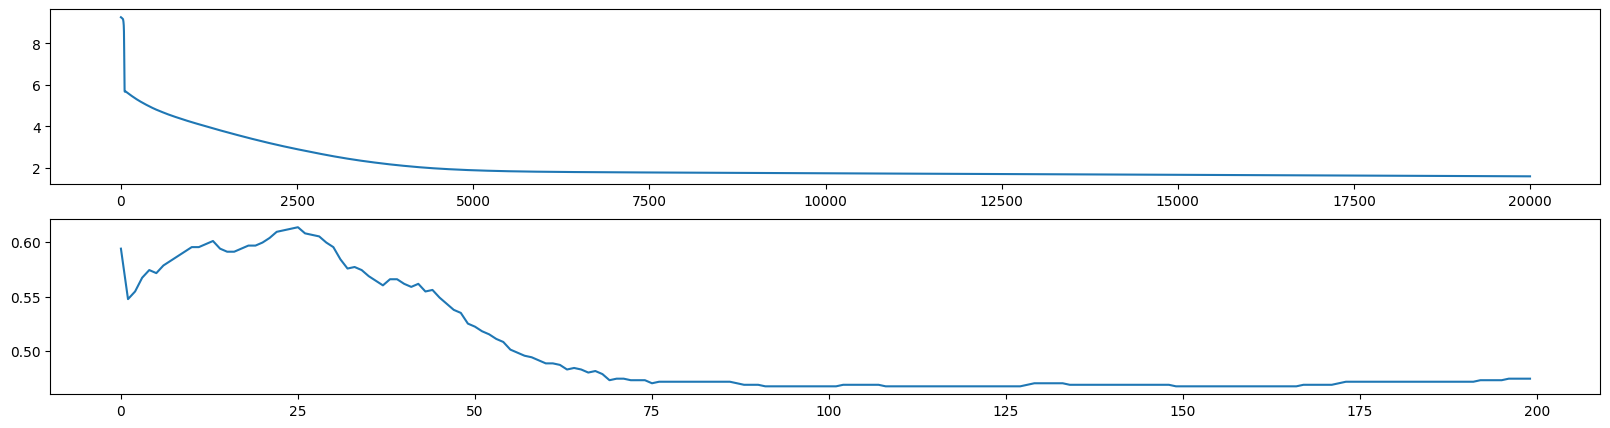

In [110]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
plt.plot(losses)

plt.subplot(2,1,2)
plt.plot(train_accuracies)